# Project: Analyzing Financial Markets

This Jupyter Notebook will help guide you through your project of analyzing financial data using the python data science workflow and techniques available in the python arsenal.

# Import Libraries and Modules

You will almost always be importing modules to work with your project.

The syntax for importing is as follows:

* import [module] as [alias]
* from [module] import [submodule]

In [1]:
# import numpy modules for numerical analysis
import numpy as np
from numpy import log

# import matplotlib for visualization
from matplotlib import pyplot as plt

# import pandas for structuring data
import pandas as pd
import pandas_datareader.data as web
from pandas import DataFrame

# extra tools for jupyter notebook
from IPython.display import display, Image, IFrame

# communicating with APIs online to extract data
from requests import get

# datetime module for working with time
import datetime
from dateutil.parser import parse

# plot graphs within jupyter notebook
%matplotlib inline

# Week 1: Learning to connect to Yahoo stocks API and Quandl API


# Extracting Financial Data

There are at least two ways to extract data within jupyter notebook:

* using the DataReader method from pandas library
* using the requests module

We will look at how to extract data using both methods.

What about the source of data? We will also extract data from two different sources, to give you a flavour of the available databases:

* Yahoo stocks API (there are many for stocks, including Google)
* Quandl

For the purpose of this week, just get used to connecting to API's and extracting data from them, don't worry about the details about the pandas library and matplotlib and graphing, you will learn all of this in later lectures.

# Extracting data from Yahoo stocks API using panda's built-in DataReader

Recall that we previous used this import: import pandas_datareader.data as web


In [2]:
# set up our time frame for extracting data from the Yahoo stocks API
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime.now()

# extract data from yahoo's API, and put into pandas dataframe via DataReader method
a = web.DataReader(name='AAPL', data_source='yahoo',
                  start=start)

m = web.DataReader(name='MSFT', data_source='yahoo',
                  start=start)

g = web.DataReader(name='GOOG', data_source='yahoo',
                  start=start)

In [84]:
# get some basic info about your DataFrame
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2016-01-04 to 2016-10-28
Data columns (total 6 columns):
Open         209 non-null float64
High         209 non-null float64
Low          209 non-null float64
Close        209 non-null float64
Volume       209 non-null int64
Adj Close    209 non-null float64
dtypes: float64(5), int64(1)
memory usage: 11.4 KB


In [85]:
# get the last couple of rows from the DataFrame
a.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-10-24,117.099998,117.739998,117.000000,117.650002,23538700,117.650002
2016-10-25,117.949997,118.360001,117.309998,118.250000,48129000,118.250000
2016-10-26,114.309998,115.699997,113.309998,115.589996,66134200,115.589996
2016-10-27,115.389999,115.860001,114.099998,114.480003,34562000,114.480003
2016-10-28,113.870003,115.209999,113.449997,113.720001,36670400,113.720001


In [86]:
# get the first couple of rows from the DataFrame
a.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.586180
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.990380
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,99.014030
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,94.835186
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,95.336649


In [87]:
m.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-10-24,59.939999,61.000000,59.930000,61.000000,54067000,61.000000
2016-10-25,60.849998,61.369999,60.799999,60.990002,35137200,60.990002
2016-10-26,60.810001,61.200001,60.470001,60.630001,29911600,60.630001
2016-10-27,60.610001,60.830002,60.090000,60.099998,28479900,60.099998
2016-10-28,60.009998,60.520000,59.580002,59.869999,33323400,59.869999


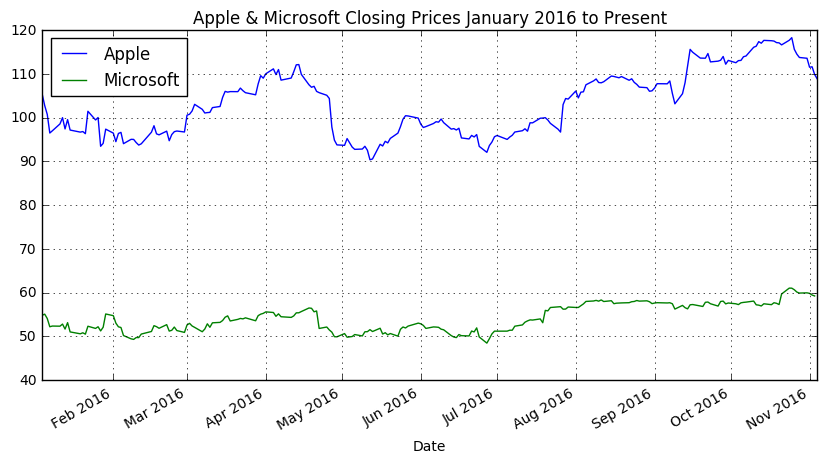

In [3]:
# call matplotlib's plotting methods

# initialize a figure object
fig = plt.subplots(figsize=(10,5))

# customize the title
plt.title("Apple & Microsoft Closing Prices January 2016 to Present")

# grab the DataFrame 'Close' column, plot this, and label the line
a['Close'].plot(label="Apple")
m['Close'].plot(label="Microsoft", grid = True)

# place the legend in the upper left corner
plt.legend(loc='upper left')

# show the plot
plt.show()

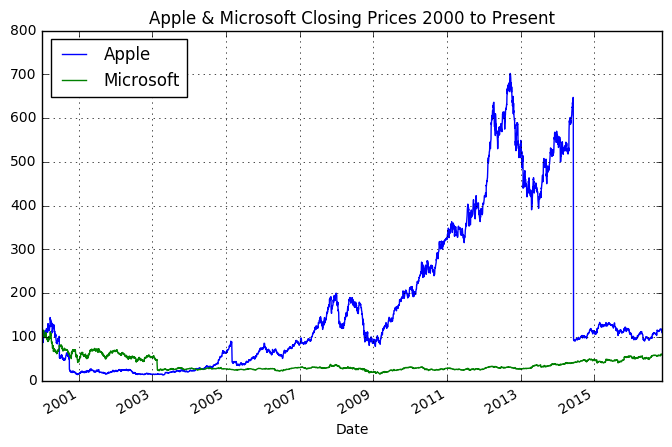

In [22]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

a = web.DataReader(name='AAPL', data_source='yahoo',
                  start=start)

m = web.DataReader(name='MSFT', data_source='yahoo',
                  start=start)

fig = plt.subplots(figsize=(8,5))
plt.title("Apple & Microsoft Closing Prices 2000 to Present")
a['Close'].plot(label="Apple")
m['Close'].plot(label="Microsoft", grid = True)

plt.legend(loc='upper left')
plt.show()

# Extracting data from Quandl using requests library's get method

First go to the Quandl website https://www.quandl.com and explore what data they have available.

Once you figure out the URL that you need to connect to quandl's API, use requests' get method to connect


### Extract Microsoft stocks data from Quandl's API

In [13]:
# found out URL required to connect to Microsoft stocks info from quandl
url = 'https://www.quandl.com/api/v3/datasets/YAHOO/MSFT.json?api_key=justm8rcsyJJL2FcPBzu'

# connect to the API using requests' get method
response = get(url)

# check to make sure connection worked, if you get [200], it means it worked
response

<Response [200]>

In [14]:
# take a peek at the data's structure returned from Quandl's API
print response.json()

{u'dataset': {u'dataset_code': u'MSFT', u'column_names': [u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adjusted Close'], u'newest_available_date': u'2016-11-04', u'description': u'Exchange : . Key Statistics', u'end_date': u'2016-11-04', u'data': [[u'2016-11-04', 58.650002, 59.279999, 58.52, 58.709999, 28619500.0, 58.709999], [u'2016-11-03', 59.529999, 59.639999, 59.110001, 59.209999, 21600400.0, 59.209999], [u'2016-11-02', 59.82, 59.93, 59.299999, 59.43, 22147000.0, 59.43], [u'2016-11-01', 59.970001, 60.02, 59.25, 59.799999, 24533000.0, 59.799999], [u'2016-10-31', 60.16, 60.419998, 59.919998, 59.919998, 26434700.0, 59.919998], [u'2016-10-28', 60.009998, 60.52, 59.580002, 59.869999, 33574700.0, 59.869999], [u'2016-10-27', 60.610001, 60.830002, 60.09, 60.099998, 28479900.0, 60.099998], [u'2016-10-26', 60.810001, 61.200001, 60.470001, 60.630001, 29911600.0, 60.630001], [u'2016-10-25', 60.849998, 61.369999, 60.799999, 60.990002, 35137200.0, 60.990002], [u'2016-10-24', 59.9399

In [10]:
# peek at the keys available
print response.json().keys()

[u'dataset']


In [11]:
# we want to grab the 'data' values from the 'dataset' key, as an example,
# calling on the 0th element of the 'data' key will give us this:
response.json()['dataset']['data'][0]                                        

[u'2016-11-04', 58.650002, 59.279999, 58.52, 58.709999, 28619500.0, 58.709999]

In [15]:
# now that we know what the data looks like after we extract from Quandl's API,
# we can store it in pandas DataFrame
json = response.json()
df = DataFrame(json['dataset']['data'], columns=json['dataset']['column_names'])
df.index = df.Date
df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,,
2016-11-01,2016-11-01,59.970001,60.020000,59.250000,59.799999,24469200.0,59.799999
2016-10-31,2016-10-31,60.160000,60.419998,59.919998,59.919998,26434700.0,59.919998
2016-10-28,2016-10-28,60.009998,60.520000,59.580002,59.869999,33574700.0,59.869999
2016-10-27,2016-10-27,60.610001,60.830002,60.090000,60.099998,28479900.0,60.099998
2016-10-26,2016-10-26,60.810001,61.200001,60.470001,60.630001,29911600.0,60.630001


In [39]:
# peek the tail
df.tail()

,Date,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,,
1986-03-19,1986-03-19,28.751040,28.998720,27.999361,28.249920,4.789440e+07,0.067053
1986-03-18,1986-03-18,29.499840,29.750399,28.500479,28.751040,6.776640e+07,0.068243
1986-03-17,1986-03-17,28.998720,29.750399,28.998720,29.499840,1.331712e+08,0.070020
1986-03-14,1986-03-14,27.999361,29.499840,27.999361,28.998720,3.081600e+08,0.068831
1986-03-13,1986-03-13,25.499521,29.249279,25.499521,27.999361,1.031789e+09,0.066459


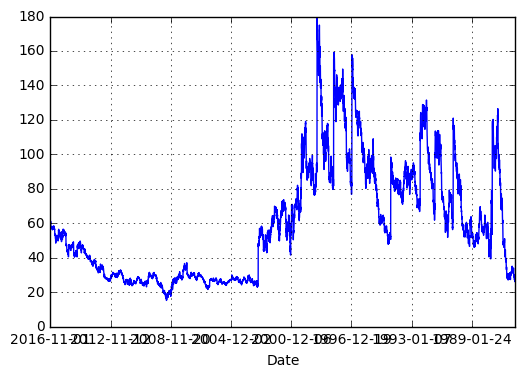

In [16]:
# plot using pandas DataFrame's internal plot method
df['Close'].plot(grid = True)

In [42]:
# the date values itself are not formatted nicely
df.index

Index([u'2016-10-28', u'2016-10-27', u'2016-10-26', u'2016-10-25',
       u'2016-10-24', u'2016-10-21', u'2016-10-20', u'2016-10-19',
       u'2016-10-18', u'2016-10-17',
       ...
       u'1986-03-26', u'1986-03-25', u'1986-03-24', u'1986-03-21',
       u'1986-03-20', u'1986-03-19', u'1986-03-18', u'1986-03-17',
       u'1986-03-14', u'1986-03-13'],
      dtype='object', name=u'Date', length=7724)

In [44]:
# format the dates nicely using parse
df.index = df['Date'].apply(parse)

In [45]:
# now the date formatting has changed
df.index

DatetimeIndex(['2016-10-28', '2016-10-27', '2016-10-26', '2016-10-25',
               '2016-10-24', '2016-10-21', '2016-10-20', '2016-10-19',
               '2016-10-18', '2016-10-17',
               ...
               '1986-03-26', '1986-03-25', '1986-03-24', '1986-03-21',
               '1986-03-20', '1986-03-19', '1986-03-18', '1986-03-17',
               '1986-03-14', '1986-03-13'],
              dtype='datetime64[ns]', name=u'Date', length=7724, freq=None)

## Extract SP500 index stocks data from Quandl

In [74]:
# found out Quandl's SP500 index stocks URL
url = 'https://www.quandl.com/api/v3/datasets/YAHOO/INDEX_GSPC.json?api_key=justm8rcsyJJL2FcPBzu'

In [21]:
# connect to Quandl's SP500 data via requests' get method, then store it in pandas' DataFrame object
response = get(url)
sp500_df = DataFrame(response.json()['dataset']['data'], columns=response.json()['dataset']['column_names'])

# format the date data so it looks nice using parse
sp500_df.index = sp500_df.Date.apply(parse)

# create a column called Returns
sp500_df['Returns'] = log(sp500_df['Close'] / sp500_df['Close'].shift(1)).cumsum()

# peek at the DataFrame
sp500_df.head()

,Date,Open,High,Low,Close,Volume,Adjusted Close,Returns
Date,,,,,,,,
2016-11-01,2016-11-01,59.970001,60.020000,59.250000,59.799999,24469200.0,59.799999,NaN
2016-10-31,2016-10-31,60.160000,60.419998,59.919998,59.919998,26434700.0,59.919998,0.002005
2016-10-28,2016-10-28,60.009998,60.520000,59.580002,59.869999,33574700.0,59.869999,0.001170
2016-10-27,2016-10-27,60.610001,60.830002,60.090000,60.099998,28479900.0,60.099998,0.005004
2016-10-26,2016-10-26,60.810001,61.200001,60.470001,60.630001,29911600.0,60.630001,0.013784


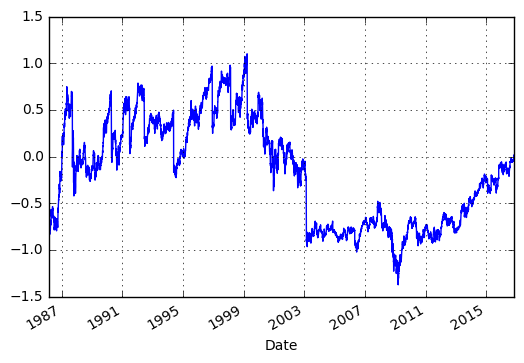

In [22]:
# plot Returns
sp500_df['Returns'].plot(grid = True)

# Explore Major U.S. Contractors via Yahoo Stocks API and DataReader

Using the first technique of data extraction using Yahoo stocks API and pandas' DataReader method, let's explore the stocks of some major U.S. contractors

In [15]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

lockheed = web.DataReader(name='LMT', data_source='yahoo',
                  start=start)

boeing = web.DataReader(name='BA', data_source='yahoo',
                  start=start)

raytheon = web.DataReader(name='RTN', data_source='yahoo',
                  start=start)

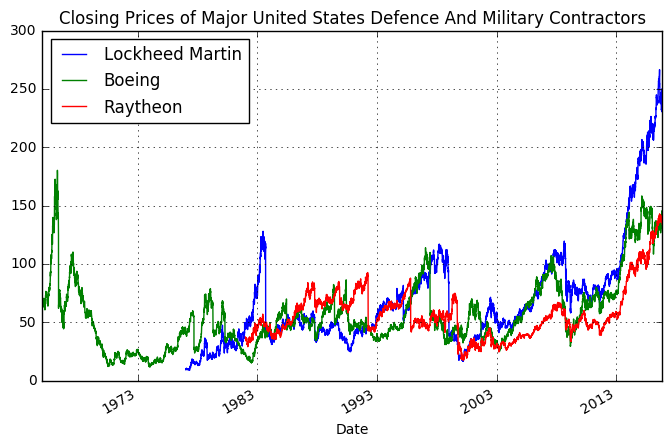

In [20]:
fig = plt.subplots(figsize=(8,5))
plt.title("Closing Prices of Major United States Defence And Military Contractors")
lockheed['Close'].plot(label="Lockheed Martin")
boeing['Close'].plot(label="Boeing")
raytheon['Close'].plot(label="Raytheon", grid = True)
plt.legend(loc='upper left')
plt.show()

In [19]:
start = datetime.datetime(1965, 1, 1)
end = datetime.datetime.now()

lockheed = web.DataReader(name='LMT', data_source='yahoo',
                  start=start)

boeing = web.DataReader(name='BA', data_source='yahoo',
                  start=start)

raytheon = web.DataReader(name='RTN', data_source='yahoo',
                  start=start)

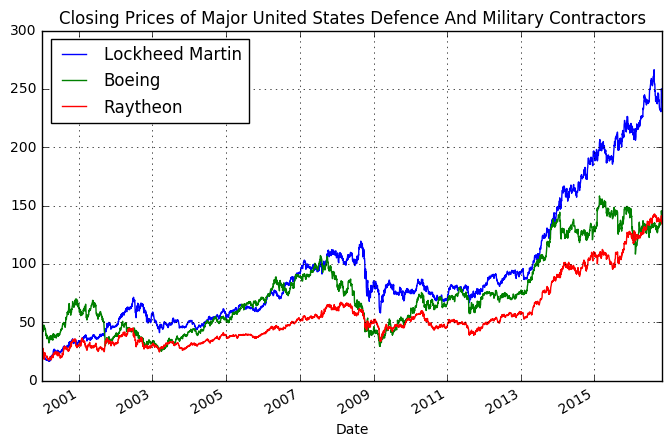

In [18]:
fig = plt.subplots(figsize=(8,5))
plt.title("Closing Prices of Major United States Defence And Military Contractors")
lockheed['Close'].plot(label="Lockheed Martin")
boeing['Close'].plot(label="Boeing")
raytheon['Close'].plot(label="Raytheon", grid = True)
plt.legend(loc='upper left')
plt.show()

In [10]:
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime.now()

lockheed = web.DataReader(name='LMT', data_source='yahoo',
                  start=start)

boeing = web.DataReader(name='BA', data_source='yahoo',
                  start=start)

raytheon = web.DataReader(name='RTN', data_source='yahoo',
                  start=start)

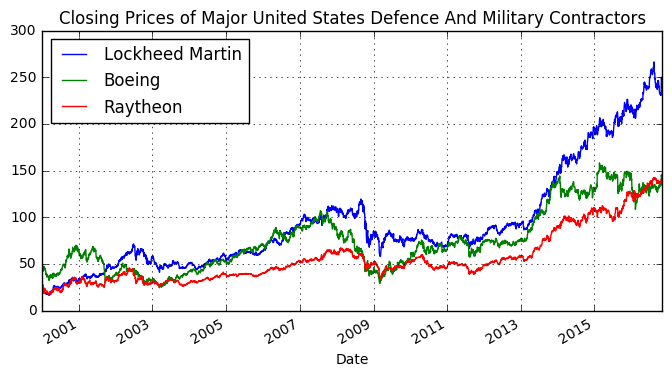

In [17]:
fig = plt.subplots(figsize=(8,4))
plt.title("Closing Prices of Major United States Defence And Military Contractors")
lockheed['Close'].plot(label="Lockheed Martin")
boeing['Close'].plot(label="Boeing")
raytheon['Close'].plot(label="Raytheon", grid = True)
plt.legend(loc='upper left')

plt.show()